In [1]:
from collections import defaultdict
import gzip

import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [2]:
recs = SeqIO.parse(gzip.open(
    'SRR003265.filt.fastq.gz',
    'rt', encoding='utf-8'),
    'fastq')

In [3]:
rec = next(recs)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations)

SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


In [4]:
cnt =defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100 * cnt / tot, cnt))

G: 20.68 5359329
A: 28.60 7411928
T: 29.58 7666885
C: 21.00 5444044
N: 0.14 37289


Text(0, 0.5, 'Number of Calls')

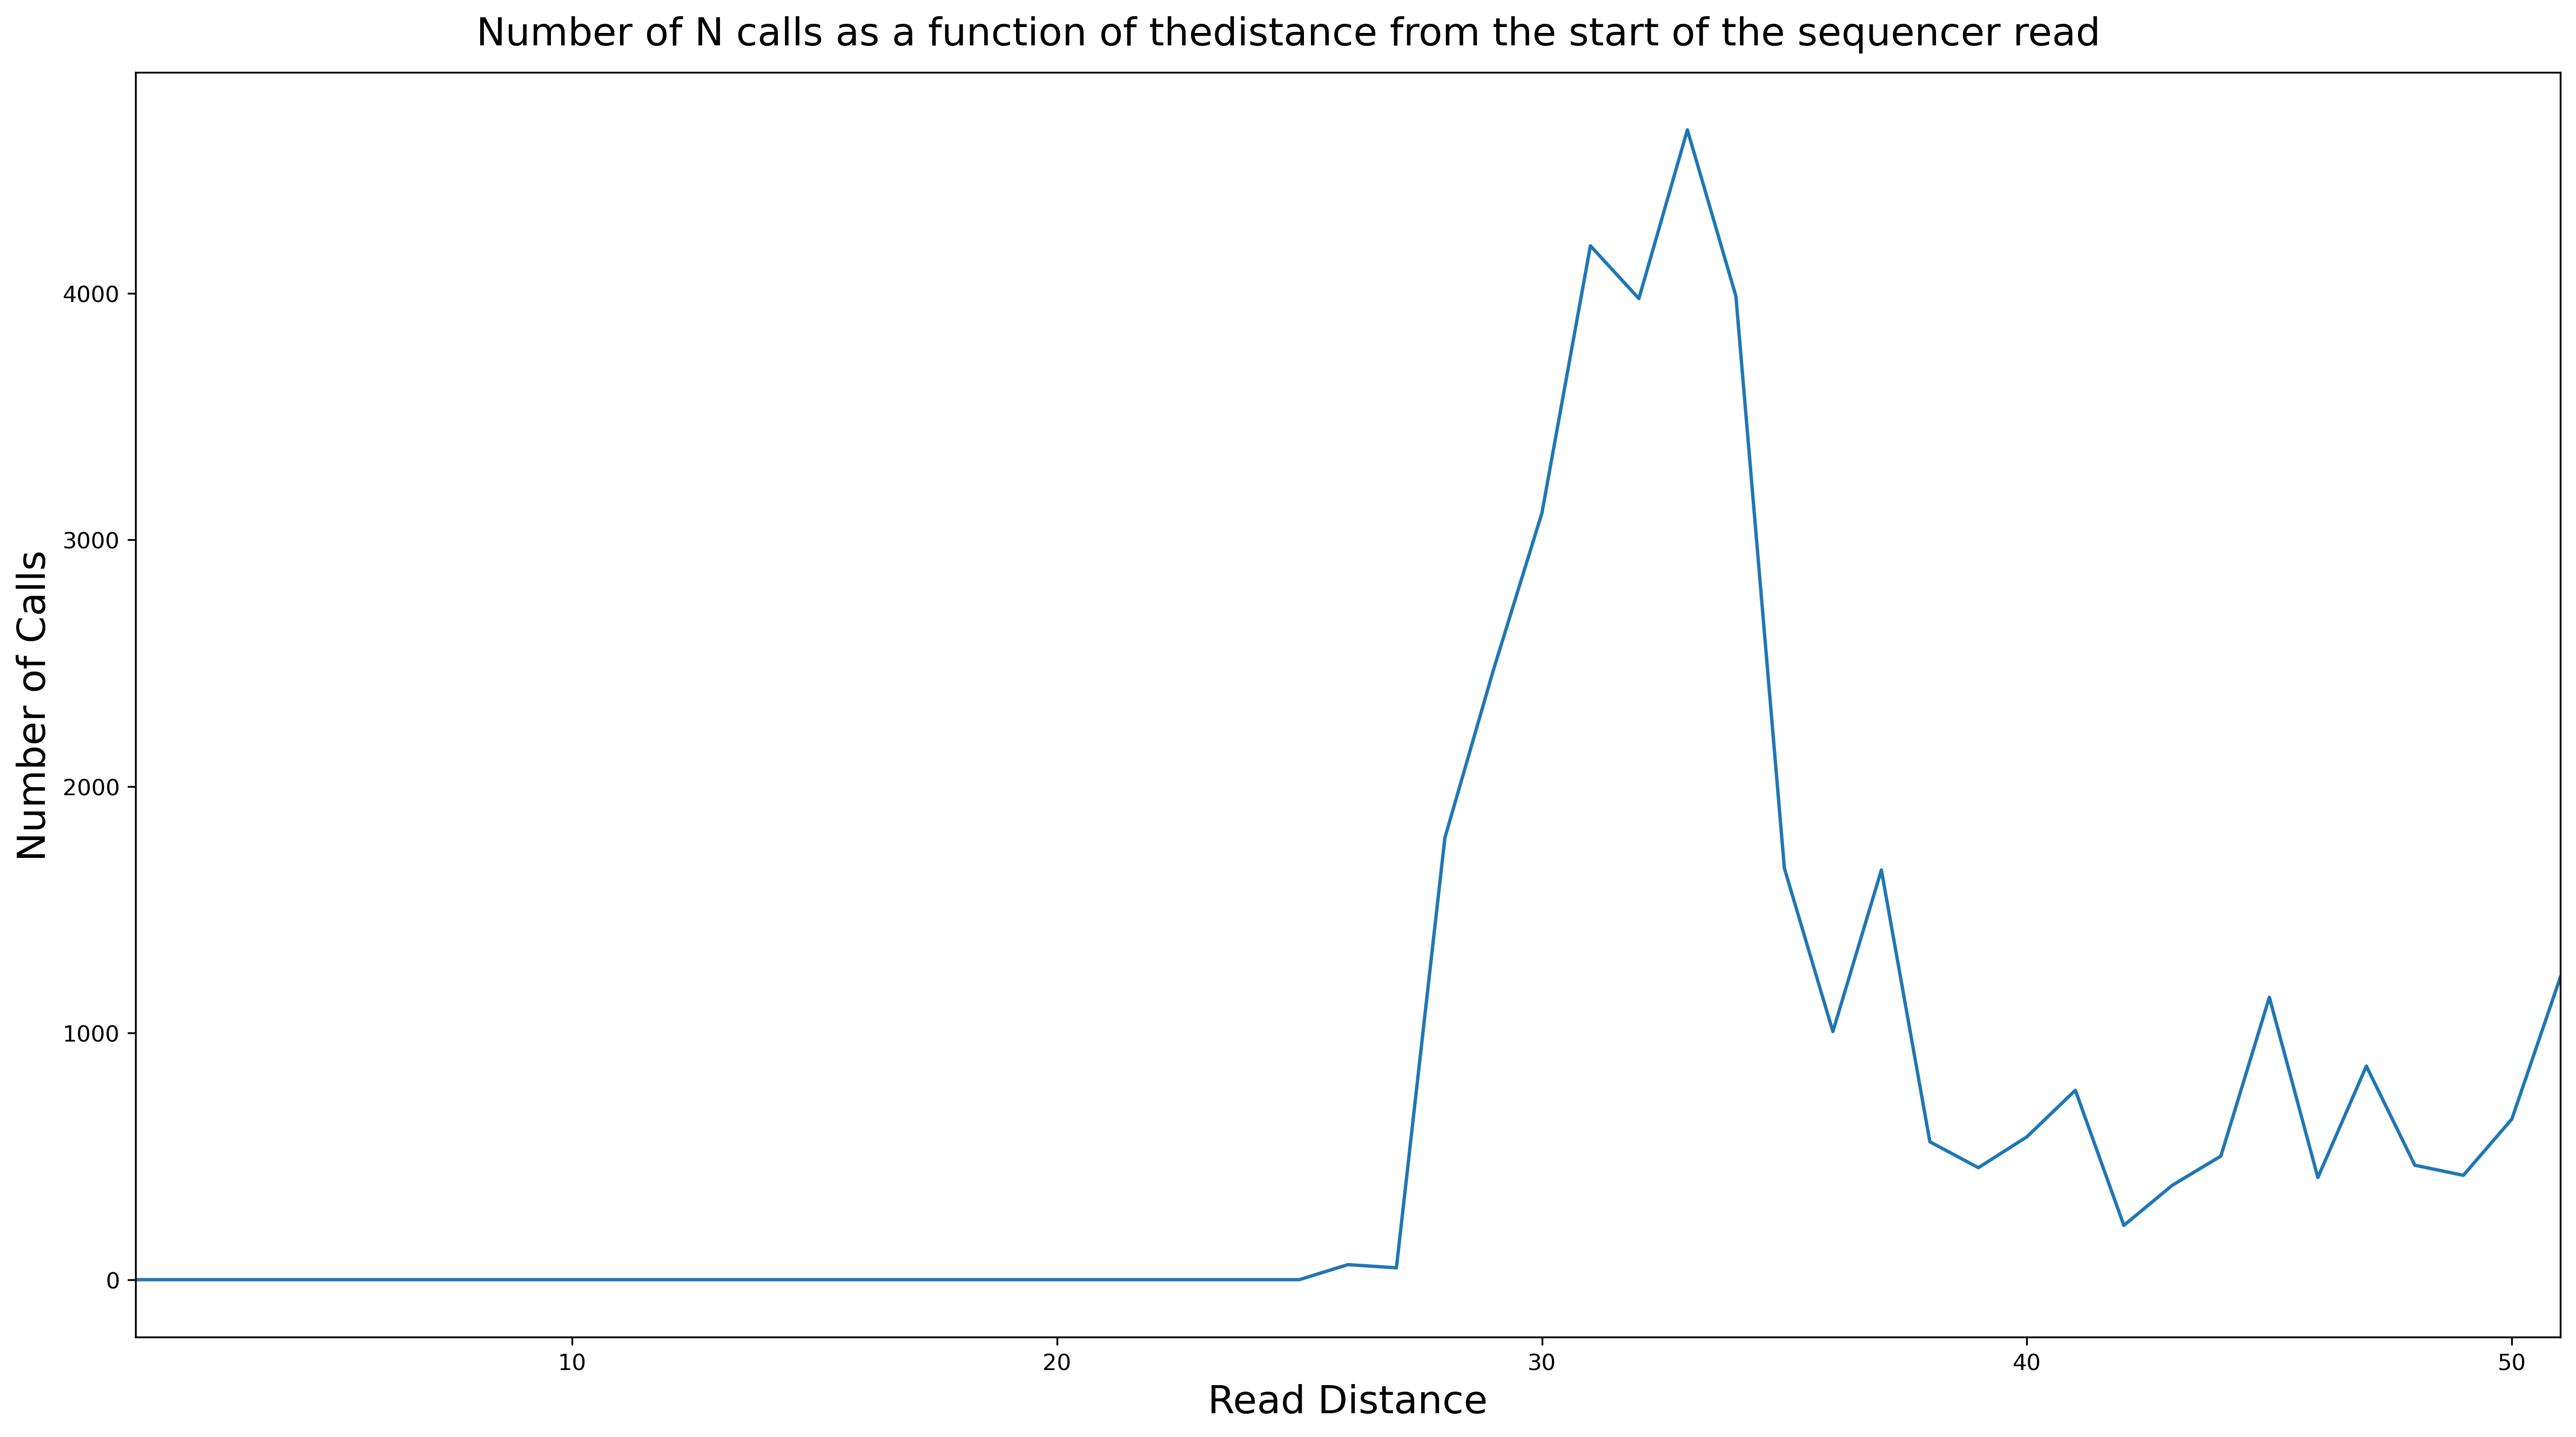

In [5]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 
                             'rt', encoding='UTF-8'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i +1
        if letter =='N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)

fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True, dpi=300)
fig.suptitle(
    'Number of N calls as a function of the\
distance from the start of the sequencer read',
        fontsize = 'xx-large'
        )
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)
ax.set_xlabel('Read Distance', fontsize='xx-large')
ax.set_ylabel('Number of Calls', fontsize='xx-large')

N calls bases that the sequencer failed to identify as a base. In this dataset, the N calls had been filtered, hence, no calls are present until position 25.

In [6]:
recs =SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 
                            'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


##### Phred Score
Now lets look into the quality of the sequencing using the Phred Score. 

$$Q_{phred} = -10log_{10}p
The quality, Q, is proportional to the logarithm base 10 of the probability, represented by p. [1]

Text(0.5, 0.98, 'Distribution of PHRED scores as a function of read distance')

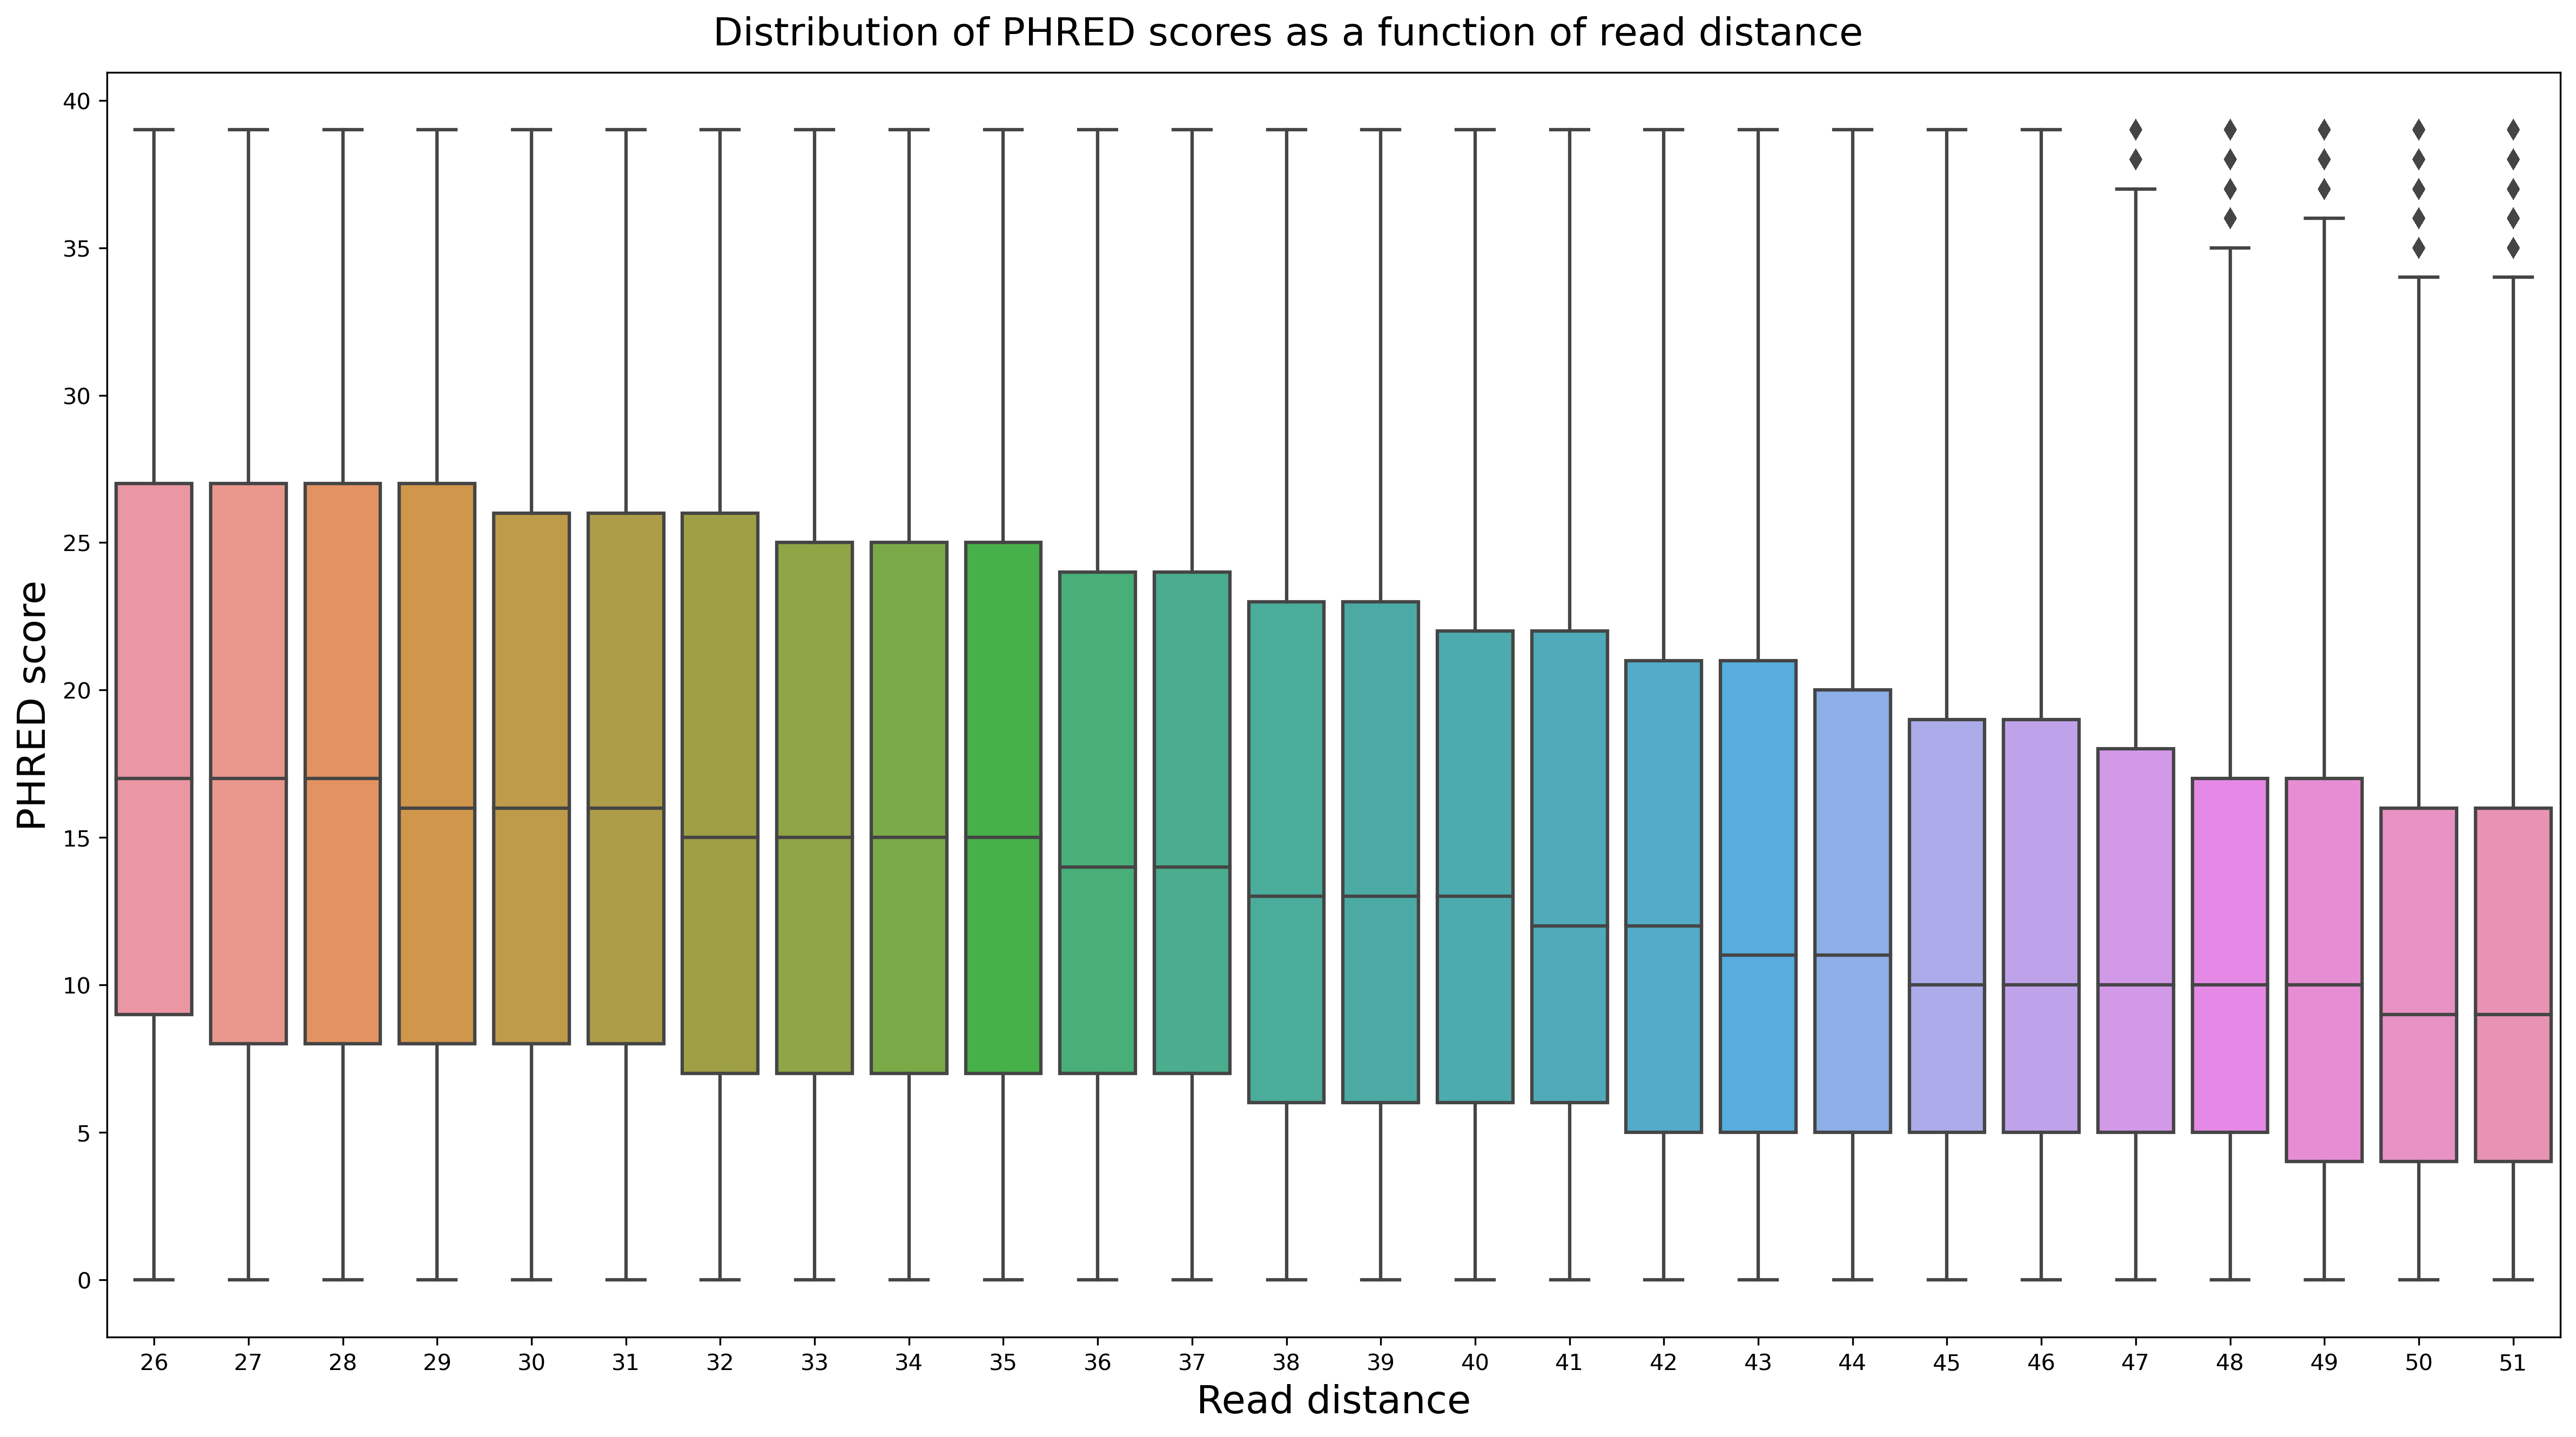

In [7]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 
                             'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9), dpi=300, tight_layout=True)
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
ax.set_xlabel('Read distance', fontsize='xx-large')
ax.set_ylabel('PHRED score', fontsize='xx-large')
fig.suptitle('Distribution of PHRED scores as a function of read distance', 
             fontsize='xx-large')

1.  Kavita Goswami, Neeti Sanan-Mishra, Chapter 7 - RNA-seq for revealing the function of the   transcriptome, Editor(s): Dev Bukhsh Singh, Rajesh Kumar Pathak, Bioinformatics, Academic Press, 2022, Pages 105-129, ISBN 9780323897754,https://doi.org/10.1016/B978-0-323-89775-4.00002-X.
(https://www.sciencedirect.com/science/article/pii/B978032389775400002X)